In [19]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.io import loadmat
import json
from PIL import Image
import pathlib
import numpy as np
from matplotlib.patches import Rectangle

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)

## SVHN Dataset

In [2]:
def load_data(dataset):
    return loadmat(dataset)

In [3]:
# Load the dataset
training_data = load_data("Dataset/SVHN/train_32x32.mat")
test_data = load_data("Dataset/SVHN/test_32x32.mat")

In [4]:
# have a look at the data
training_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

As displayed its a dictionary. We can access data using the specific ```key```.

In [5]:
x_train, y_train, x_test, y_test = training_data['X'], training_data['y'], test_data['X'], test_data['y']

# shape
print(f"X_train: {x_train.shape}, y_train: {y_train.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}")

X_train: (32, 32, 3, 73257), y_train: (73257, 1), X_test: (32, 32, 3, 26032), y_test: (26032, 1)


Need to convert the shape from:
**(width, height, channels, size) -> (size, width, height, channels)**

In [6]:
x_train = x_train.transpose((3, 0, 1, 2))
x_test = x_test.transpose((3, 0, 1, 2))

y_train = y_train[ : , 0]
y_test = y_test[ : , 0]

In [7]:
# new shape
print(f"X_train: {x_train.shape}, y_train: {y_train.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}")

X_train: (73257, 32, 32, 3), y_train: (73257,), X_test: (26032, 32, 32, 3), y_test: (26032,)


In [8]:
# change label 10 -> 0
def dataset(data):
    data[data == 10] = 0

In [9]:
dataset(x_test)
dataset(y_test)

In [10]:
# function to plot, labels shown on top of each image
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    
    for i, ax in enumerate(axes.flat):
        # for random images use j
        # j = np.random.randint(100)
        ax.imshow(images[i])
    
        # labels on top of each image

        ax.set_title(labels[i])

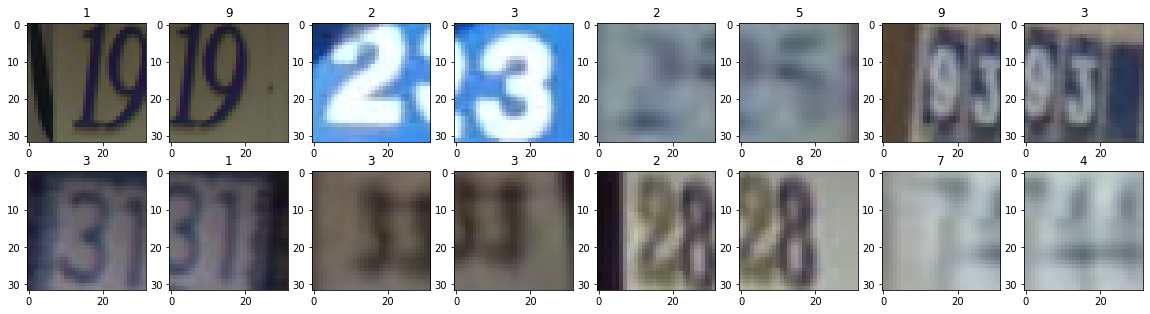

In [11]:
# plotting training images
plot_images(x_train, y_train, 2, 8)

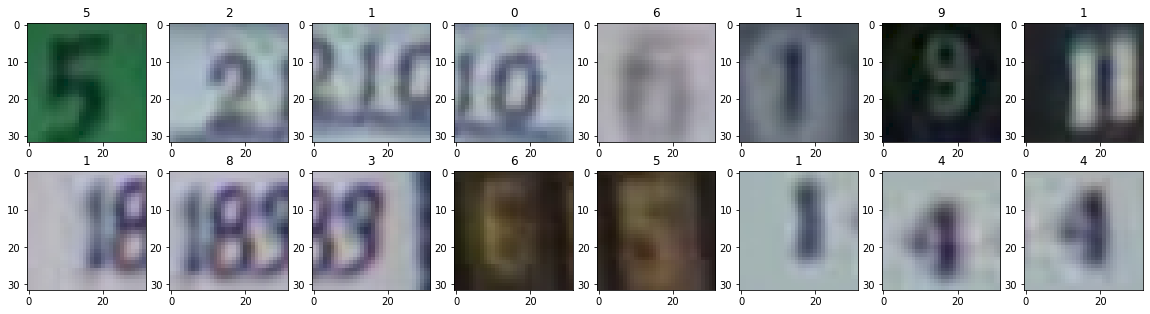

In [12]:
plot_images(x_test, y_test, 2, 8)

## Coco Dataset

In [14]:
with open("Dataset/COCO/annotations_trainval2017/annotations/person_keypoints_val2017.json") as f:
    person_keypoints = json.load(f)
    

* ```images```: contains images' ```file_name```, ```height```, ```width```, ```id``` etc.  
* ```annotations```: contains ```segmentation```, ```num_keypoints```, ```keypoints```, ```bbox```, ```image_id```, etc   
* ```categories```: contains ```supercategory```, ```id```, ```name```, ```keypoints```, ```skeleton```


### Looking inside the dictionary

In [15]:
# image details for index 0
print(person_keypoints["images"][0]["file_name"], "\n",
person_keypoints["images"][0]["height"], "\n",
person_keypoints["images"][0]["width"], "\n",
person_keypoints["images"][0]["id"])

000000397133.jpg 
 427 
 640 
 397133


In [16]:
print(person_keypoints["annotations"][0]["segmentation"], "\n",
person_keypoints["annotations"][0]["num_keypoints"], "\n",
person_keypoints["annotations"][0]["keypoints"], "\n",
person_keypoints["annotations"][0]["bbox"], "\n",
person_keypoints["annotations"][0]["image_id"])

[[125.12, 539.69, 140.94, 522.43, 100.67, 496.54, 84.85, 469.21, 73.35, 450.52, 104.99, 342.65, 168.27, 290.88, 179.78, 288, 189.84, 286.56, 191.28, 260.67, 202.79, 240.54, 221.48, 237.66, 248.81, 243.42, 257.44, 256.36, 253.12, 262.11, 253.12, 275.06, 299.15, 233.35, 329.35, 207.46, 355.24, 206.02, 363.87, 206.02, 365.3, 210.34, 373.93, 221.84, 363.87, 226.16, 363.87, 237.66, 350.92, 237.66, 332.22, 234.79, 314.97, 249.17, 271.82, 313.89, 253.12, 326.83, 227.24, 352.72, 214.29, 357.03, 212.85, 372.85, 208.54, 395.87, 228.67, 414.56, 245.93, 421.75, 266.07, 424.63, 276.13, 437.57, 266.07, 450.52, 284.76, 464.9, 286.2, 479.28, 291.96, 489.35, 310.65, 512.36, 284.76, 549.75, 244.49, 522.43, 215.73, 546.88, 199.91, 558.38, 204.22, 565.57, 189.84, 568.45, 184.09, 575.64, 172.58, 578.52, 145.26, 567.01, 117.93, 551.19, 133.75, 532.49]] 
 10 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 309, 1, 177, 320, 2, 191, 398, 2, 237, 317, 2, 233, 426, 2, 306, 233, 2, 92, 452, 2, 123, 468, 2, 0

In [17]:
print(person_keypoints["categories"][0]["supercategory"], "\n", 
     person_keypoints["categories"][0]["id"], "\n",
     person_keypoints["categories"][0]["name"], "\n",
     person_keypoints["categories"][0]["keypoints"], "\n",
     person_keypoints["categories"][0]["skeleton"])

person 
 1 
 person 
 ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'] 
 [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]


In [18]:
print(person_keypoints["categories"])

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}]


### Functions to get data

Building a dictionary which will contain all the required data about all the images. Save the dictionary in ```.json``` for future reference. Also not ALL pics contain humans.

In [20]:
dict_with_details = defaultdict(lambda : {})

In [21]:
# name of keypoints
keypoint_names = person_keypoints["categories"][0]["keypoints"]
keypoint_names

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [22]:
# height, width and image_id
def build_the_dict(file_name):
    for i in range(len(person_keypoints["images"])):
        if person_keypoints["images"][i]["file_name"] == file_name:
            dict_with_details[file_name]["height"] = person_keypoints["images"][i]["height"]
            dict_with_details[file_name]["width"] = person_keypoints["images"][i]["width"]
            dict_with_details[file_name]["image_id"] = person_keypoints["images"][i]["id"]

In [23]:
for i in pathlib.os.listdir("Dataset/COCO/val2017/"):
    build_the_dict(i)

In [24]:
# updating each images' segmentation, num_keypoints, keypoints_pos, bbox
def add_annotations(file_name, image_id):
    for i in range(len(person_keypoints['annotations'])):
        if person_keypoints['annotations'][i]['image_id'] == image_id:
            dict_with_details[file_name]["segmentation"] = person_keypoints['annotations'][i]['segmentation']
            dict_with_details[file_name]["num_keypoints"] = person_keypoints['annotations'][i]['num_keypoints']
            keypoints_list = np.array(person_keypoints['annotations'][i]['keypoints'])
            keypoints_3d = np.reshape(keypoints_list, (17, 3))
            keypoints = keypoints_3d[ : , : 2]
            valid_keypoints_pos = keypoints_3d[ : , 2] > 0
            dict_with_details[file_name]["keypoints_pos"] = keypoints
            dict_with_details[file_name]["valid_keypoints_pos"] = valid_keypoints_pos
            dict_with_details[file_name]["bbox"] = person_keypoints['annotations'][i]["bbox"]
            dict_with_details[file_name]["category_id"] = person_keypoints['annotations'][i]["category_id"]

In [25]:
for i, j in dict_with_details.items():
    add_annotations(i, j["image_id"])

In [38]:
HEIGHT = 250
WIDTH = 250
PATH = "Dataset/COCO/val2017/"
def resize_image(image_name, base_path = PATH, height = HEIGHT, width = WIDTH):
    
    x_start, y_start, w_box, h_box = dict_with_details[image_name]["bbox"]
    
    # open the image
    orig_image = Image.open(base_path + image_name)
    
    # image size
    w_img, h_img = orig_image.size
    rescaled_img = orig_image.resize((width, height), box = (x_start, y_start, x_start + w_box, y_start + h_box))
    
    print(f"Original Image Size: {w_img, h_img}")
    print(f"Rescaled Image Size: {rescaled_img.size}")
    print(f"Box Size: {w_box, h_box}")
    print(f"Box Location: {x_start, y_start}")
    
    return orig_image, rescaled_img


for i, j in dict_with_details.items():
    if j.get("category_id") is not None:
        orig_img, rescaled_img = resize_image(i)
        break



Original Image Size: (640, 427)
Rescaled Image Size: (250, 250)
Box Size: (275.11, 237.34)
Box Location: (364.89, 1.11)


In [39]:
# function to rescale keypoints to match new size
def rescale_keypoints(image_name, keypoints_pos, height = HEIGHT, width = WIDTH):
    x_start, y_start, w_box, h_box = dict_with_details[image_name]["bbox"]
    box_offset = np.asarray([x_start, y_start])
    box_dims = np.asarray([w_box, h_box])
    input_dims = np.asarray([height, width])
    rescaled_keypoints_pos = np.round((keypoints_pos - box_offset) * input_dims / box_dims).astype(int)
    return rescaled_keypoints_pos

In [40]:
def plot_keypoints(keypoints_pos, keypoint_score, keypoint_names, axis):
    score_threshold = 0.5
    
    for j in range(len(keypoint_names)):
        name = keypoint_names[j]
        x = keypoints_pos[j, 0]
        y = keypoints_pos[j, 1]
        
        if keypoint_score[j] > score_threshold:
            axis.scatter(x, y, 200)
            axis.text(x + 6, y, name, fontsize = 12, bbox = dict(facecolor = "red", alpha = 0.5), color = "w")
            

In [41]:
def plot_images(image_name):
    orig_img, rescaled_img = resize_image(image_name)
    
    rescaled_keypoints_pos = rescale_keypoints(image_name, dict_with_details[image_name]["keypoints_pos"])
    x_start, y_start, w_box, h_box = dict_with_details[image_name]["bbox"]
    # plot original image
    fig = plt.figure(1, figsize = (20, 20))
    ax1 = fig.add_subplot(121)    # left side
    ax1.imshow(orig_img)
    ax1.add_patch(Rectangle((x_start, y_start), w_box, h_box, alpha = 0.3,
                            facecolor = "blue", edgecolor = "blue", hatch = "x"))
    
    ax2 = fig.add_subplot(122)    # right side
    ax2.imshow(rescaled_img)
    ax2 = plot_keypoints(rescaled_keypoints_pos, dict_with_details[image_name]["valid_keypoints_pos"],
                        keypoint_names, ax2)
    
    plt.show()
    

In [42]:
images_with_humans = []
for i in pathlib.os.listdir("Dataset/COCO/val2017/"):
    if dict_with_details[i].get("category_id") is not None:
        images_with_humans.append(i)

Original Image Size: (640, 427)
Rescaled Image Size: (250, 250)
Box Size: (275.11, 237.34)
Box Location: (364.89, 1.11)


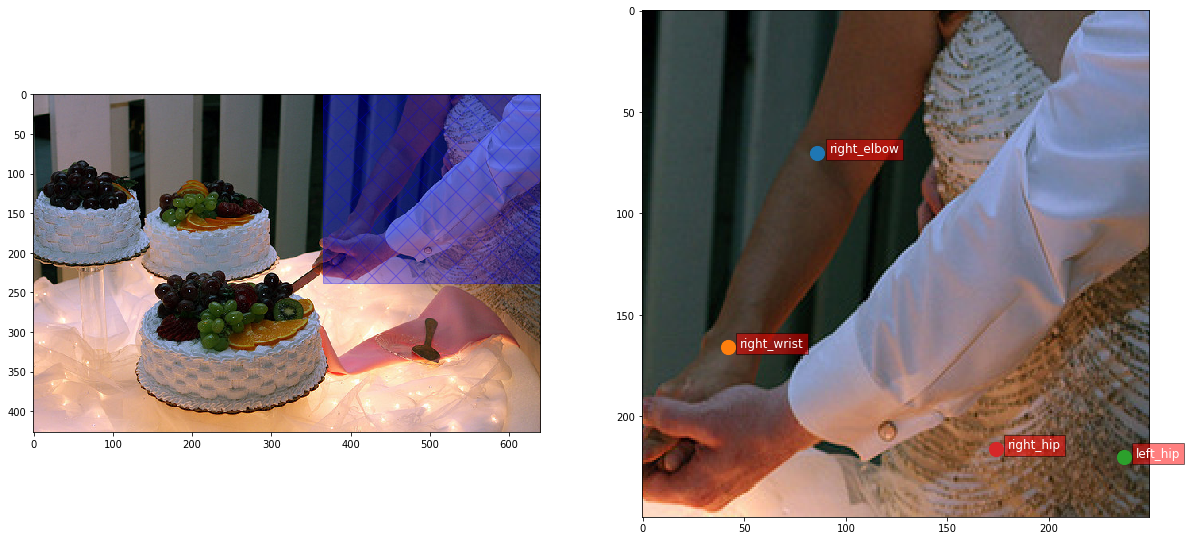

Original Image Size: (488, 640)
Rescaled Image Size: (250, 250)
Box Size: (26.68, 83.29)
Box Location: (460.78, 195.02)


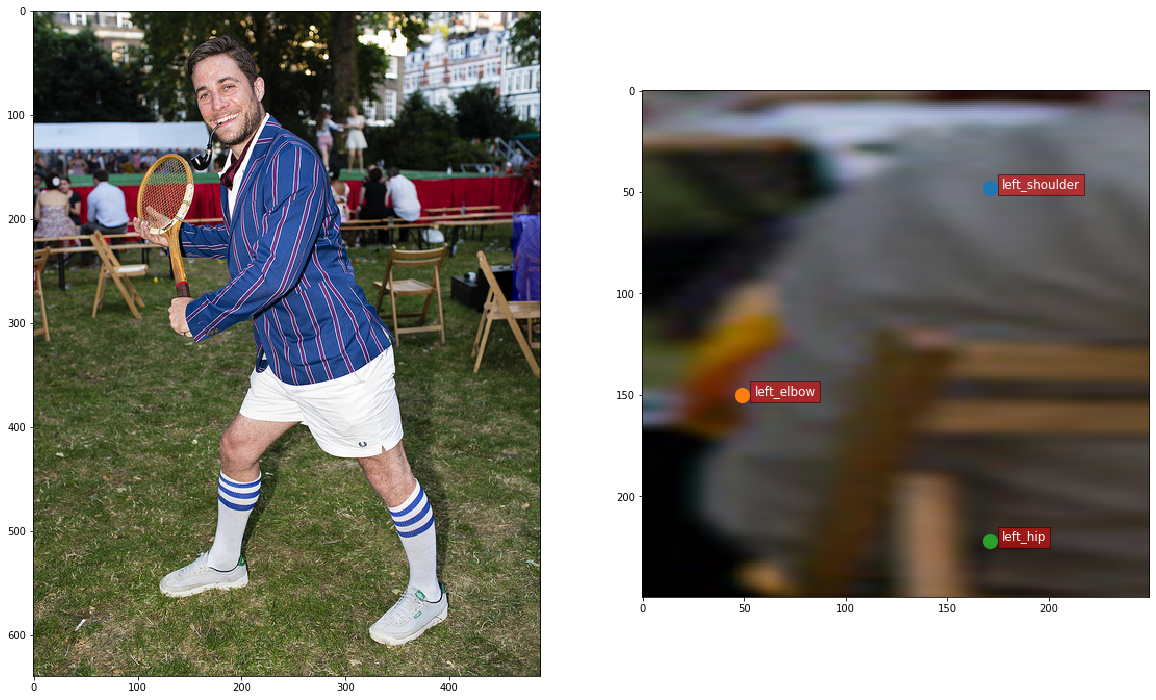

Original Image Size: (640, 433)
Rescaled Image Size: (250, 250)
Box Size: (34.44, 57.84)
Box Location: (0, 154.91)


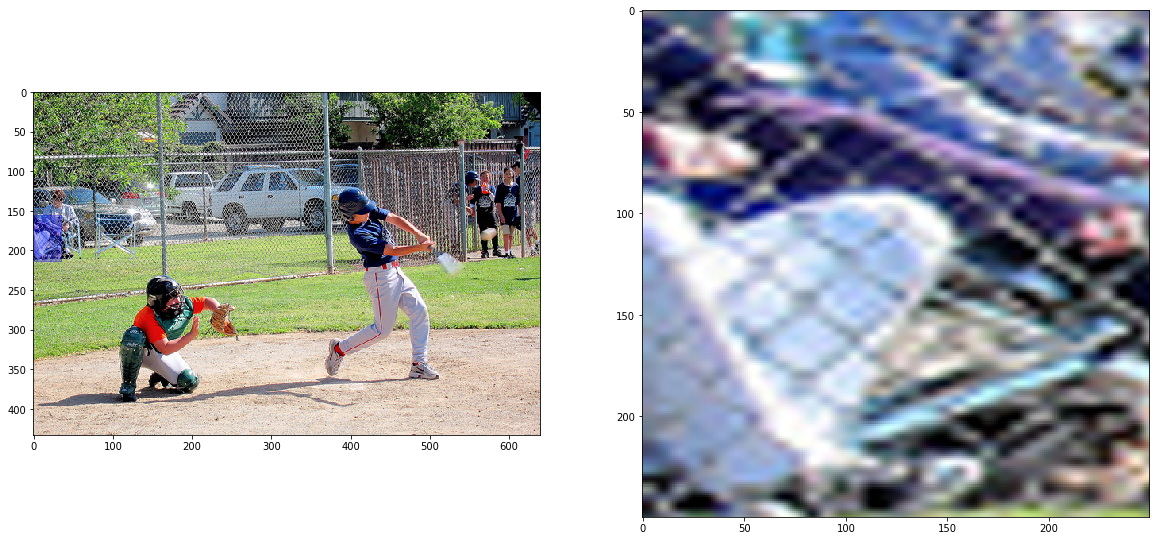

Original Image Size: (640, 480)
Rescaled Image Size: (250, 250)
Box Size: (114.77, 191.11)
Box Location: (524.91, 55.11)


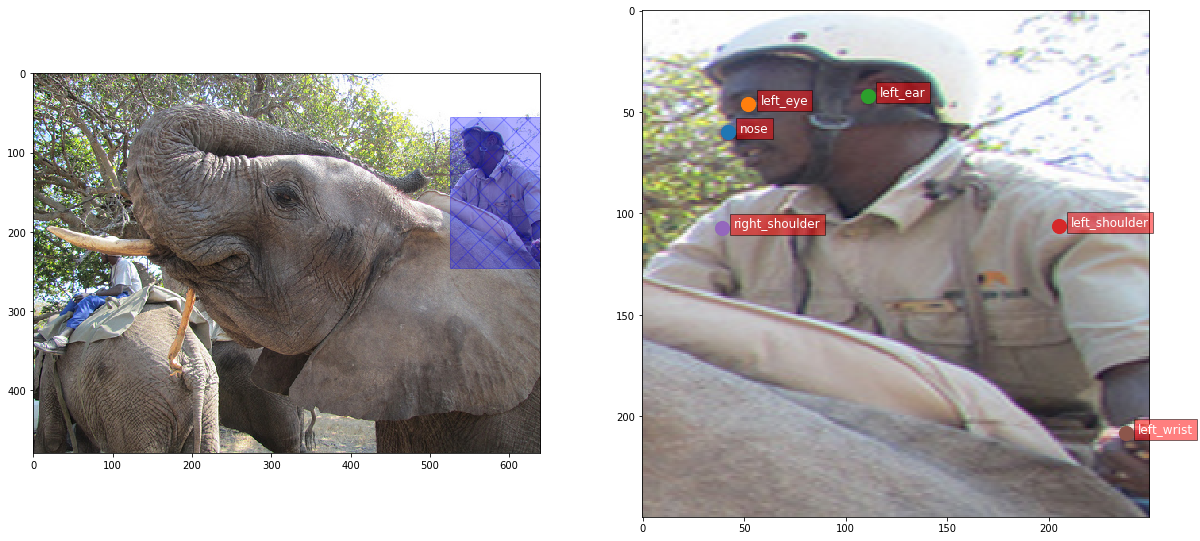

Original Image Size: (640, 427)
Rescaled Image Size: (250, 250)
Box Size: (26.18, 84.4)
Box Location: (105.94, 2.15)


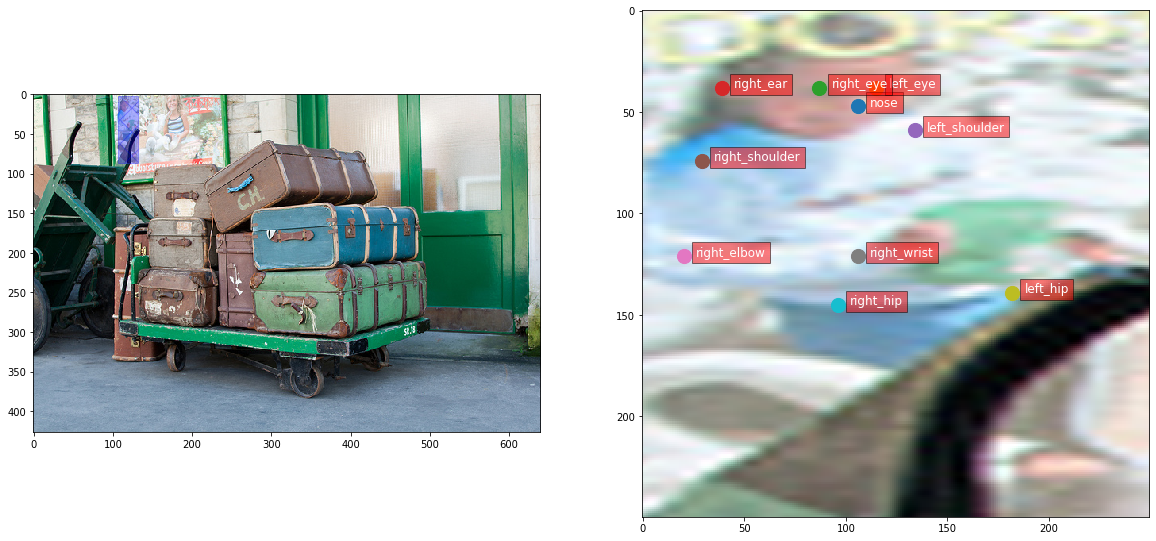

In [43]:
for i in range(5):
    plot_images(images_with_humans[i])